# Lab | Customer Analysis Round 5

For this lab, we still keep using the marketing_customer_analysis.csv file that you can find in the files_for_lab folder.

Get the data

We are using the marketing_customer_analysis.csv file.

Dealing with the data

Already done in the round 2.

Explore the data

Done in the round 3.

Processing Data

(Further processing...)

X-y split.
Normalize (numerical).

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/Users/igorhufnagel/Desktop/Ironhack/LABS/Week 3/LAB_customer-analysis-round-5/lab-customer-analysis-round-5/files_for_lab/csv_files/marketing_customer_analysis.csv')

In [4]:
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [5]:
# Using the numericals columns

numericals = data.select_dtypes(include=['float64', 'int64'])

In [6]:
numericals.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


In [47]:
X = numericals.drop(["Total Claim Amount", "Number of Open Complaints"], axis=1) # I will consider the Number of Open Complaints as Categorical
Y = numericals["Total Claim Amount"]
Y

0        384.811147
1       1131.464935
2        566.472247
3        529.881344
4        138.130879
           ...     
9129     198.234764
9130     379.200000
9131     790.784983
9132     691.200000
9133     369.600000
Name: Total Claim Amount, Length: 9134, dtype: float64

In [58]:
for col in X.columns:
    for i in X[col]:
        if i <= 0:
            X[column] = X[column].replace(X[column].mean())
            print('In the column',col,'the mean is:',mean)
            break

In the column Income the mean is: 37657.38000875848
In the column Months Since Last Claim the mean is: 15.097000218962119
In the column Months Since Policy Inception the mean is: 48.064593825268226


In [ ]:
# in the code above I just was checking which columns I need to apply the mean at the values

In [76]:
X['Income'].mean()

48.064593825268226

In [77]:
X['Months Since Last Claim'].mean()

15.097000218962119

In [78]:
X['Months Since Policy Inception'].mean()

48.064593825268226

In [97]:
X['Income_2'] = np.where(X['Income'] <= 0, X['Income'].mean(), X['Income'])

In [98]:
X['Months Since Last Claim_2'] = np.where(X['Months Since Last Claim'] <= 0, X['Months Since Last Claim'].mean(), X['Months Since Last Claim'])

In [99]:
X['Months Since Policy Inception_2'] = np.where(X['Months Since Policy Inception'] <=0, X['Months Since Policy Inception'].mean(), X['Months Since Policy Inception'])

In [100]:
from scipy import stats

In [111]:
X.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Policies,Income_2,Months Since Last Claim_2,Months Since Policy Inception_2,Months Since Last Claim_BX,Income_BX
0,2763.519279,56274,69,32,5,1,56274.000000,32.0,5.0,10.809132,42.114983
1,6979.535903,0,94,13,42,8,37657.380009,13.0,42.0,5.783269,38.346277
2,12887.431650,48767,108,18,38,2,48767.000000,18.0,38.0,7.311427,40.735368
3,7645.861827,0,106,18,65,7,37657.380009,18.0,65.0,7.311427,38.346277
4,2813.692575,43836,73,12,44,1,43836.000000,12.0,44.0,5.448624,39.734641


In [112]:
stats.boxcox(X['Income_2'])

(array([42.11498267, 38.34627666, 40.73536758, ..., 38.34627666,
        33.75131941, 38.34627666]),
 0.20848018430247728)

In [113]:
X['Income_BX'] = stats.boxcox(X['Income_2'])[0]

In [114]:
stats.boxcox(X['Months Since Last Claim_2'])

(array([10.8091316 ,  5.78326935,  7.31142719, ...,  4.36374168,
        11.2484994 ,  1.52398721]),
 0.5665215402251932)

In [115]:
X['Months Since Last Claim_BX'] = stats.boxcox(X['Months Since Last Claim_2'])[0]

In [116]:
stats.boxcox(X['Months Since Policy Inception_2'])

(array([ 3.01730086, 18.77038676, 17.38022491, ..., 17.02624808,
         1.66766072, 33.34384569]),
 0.7134555542476134)

In [117]:
X['Months Since Policy Inception_BX'] = stats.boxcox(X['Months Since Last Claim_2'])[0]

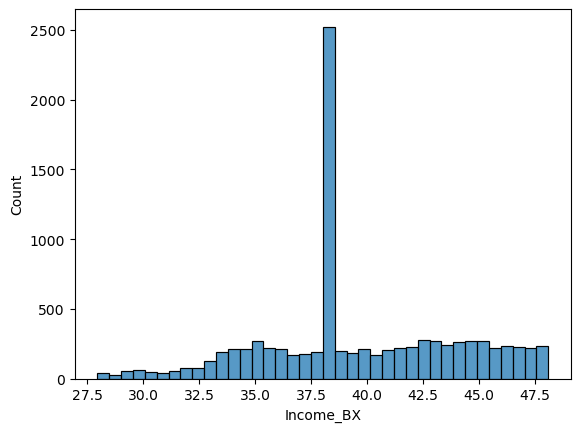

In [118]:
sns.histplot(X['Income_BX'])
plt.show()

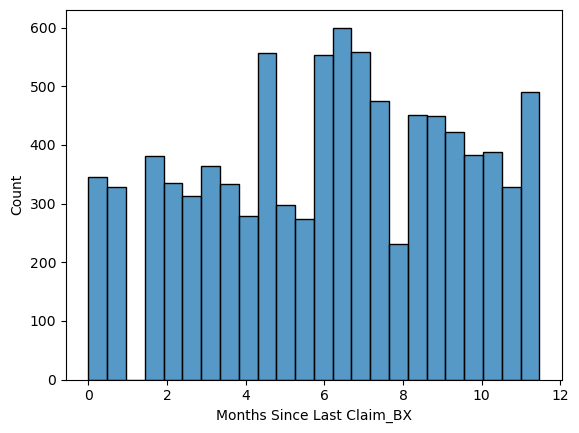

In [119]:
sns.histplot(X['Months Since Last Claim_BX'])
plt.show()

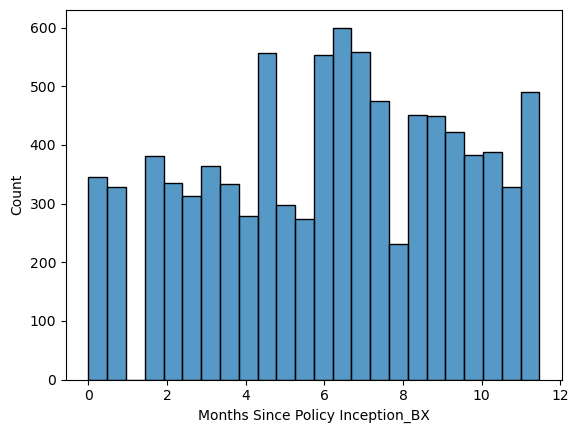

In [120]:
sns.histplot(X['Months Since Policy Inception_BX'])
plt.show()

In [ ]:
# With the boxcox function we obtained the best normalized data that we could get. 
# (when compared with the log function in class)